In [2]:
!pip install numpy pandas matplotlib seaborn

In [3]:
import pandas as pd

In [4]:
properties_df = pd.read_csv("realtor-data.zip.csv")

In [5]:
properties_df.shape

(2226382, 12)

In [6]:
properties_df_nc = properties_df[properties_df['state'] == "North Carolina"]
## drop all rows which are not north carolina

In [7]:
for_sale_nc = properties_df_nc[properties_df_nc['status'] == 'for_sale']

In [8]:
for_sale_clt = for_sale_nc[for_sale_nc['city'] == 'Charlotte']

In [9]:
for_sale_clt = for_sale_clt.drop('brokered_by', axis=1)

In [10]:
for_sale_clt = for_sale_clt.drop('prev_sold_date', axis=1)

In [11]:
for_sale_clt = for_sale_clt.dropna()

In [12]:
for_sale_clt.shape

(1180, 10)

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

In [15]:
for_sale_clt = for_sale_clt.drop('status', axis=1)

In [16]:
for_sale_clt = for_sale_clt.drop('street', axis=1)

In [17]:
for_sale_clt = for_sale_clt.drop('state', axis=1)

In [18]:
for_sale_clt = for_sale_clt.drop('city', axis=1)

In [19]:
for_sale_clt.head()

,price,bed,bath,acre_lot,zip_code,house_size
298133,2927972.0,4.0,5.0,3.74,28214.0,5076.0
298732,265000.0,2.0,1.0,0.24,28208.0,975.0
298734,825000.0,5.0,4.0,0.36,28210.0,3510.0
298737,353500.0,3.0,3.0,0.12,28214.0,1928.0
298738,489900.0,2.0,1.0,0.16,28209.0,1070.0


In [20]:
for_sale_clt_string_zip = for_sale_clt

In [21]:
for_sale_clt_string_zip['zip_code'] = for_sale_clt['zip_code'].astype(str)

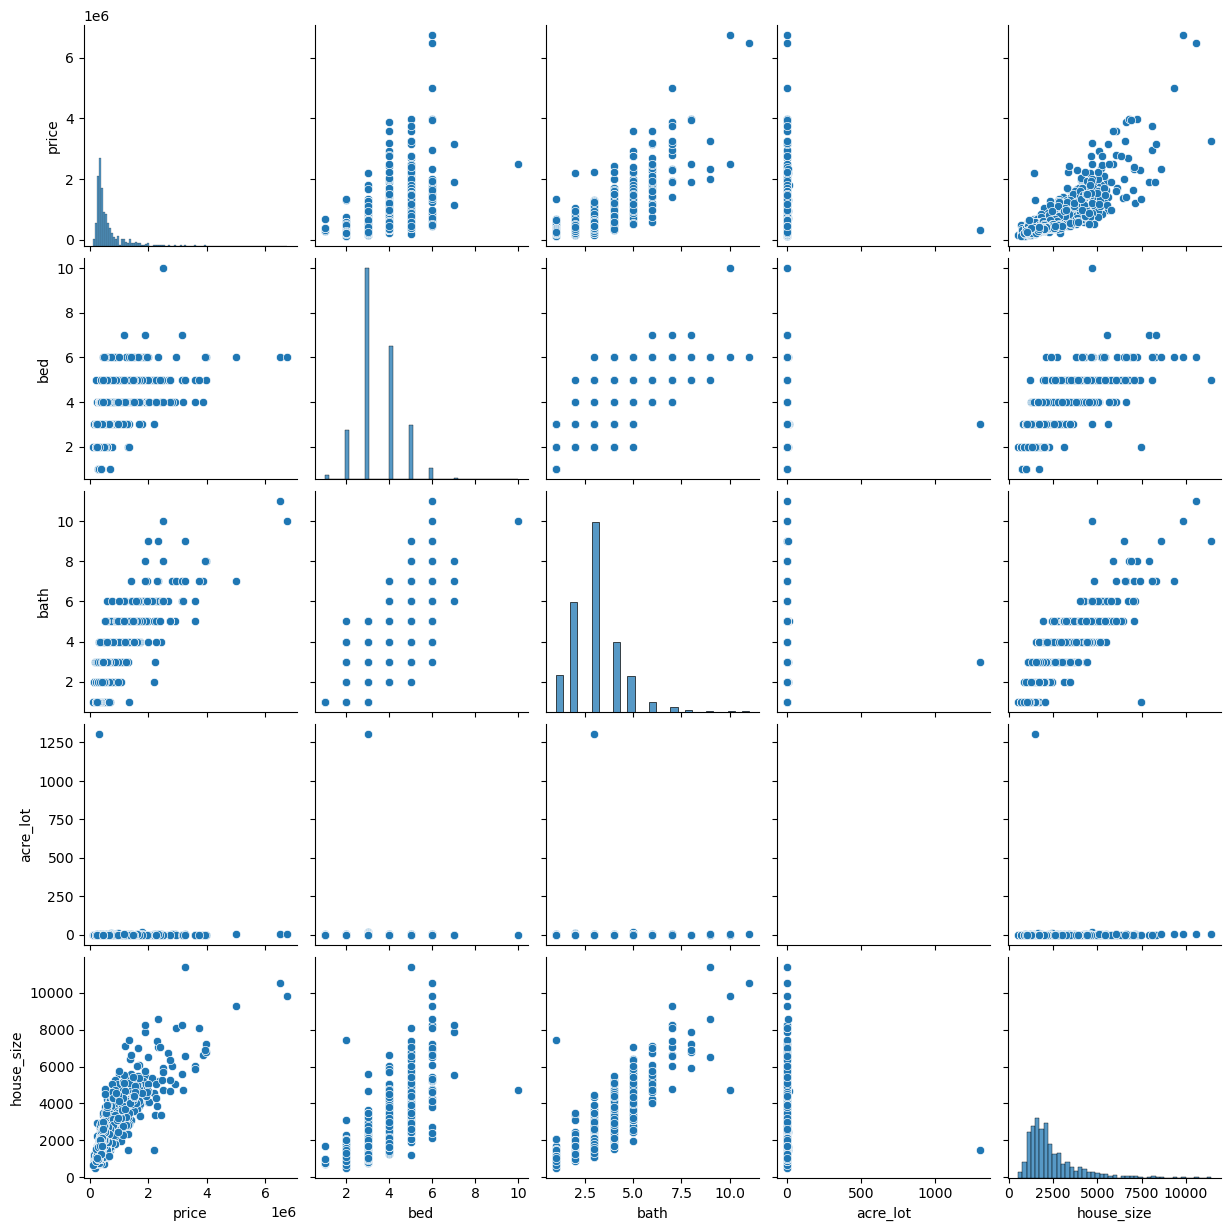

In [22]:
sns.pairplot(data=for_sale_clt_string_zip)

In [23]:
for_sale_clt['zip_code'].unique()

array(['28214.0', '28208.0', '28210.0', '28209.0', '28278.0', '28226.0',
       '28217.0', '28277.0', '28205.0', '28207.0', '28211.0', '28216.0',
       '28206.0', '28203.0', '28269.0', '28270.0', '28202.0', '28273.0',
       '28204.0', '28227.0', '28212.0', '28213.0', '28215.0', '28262.0'],
      dtype=object)

<Axes: xlabel='house_size', ylabel='price'>

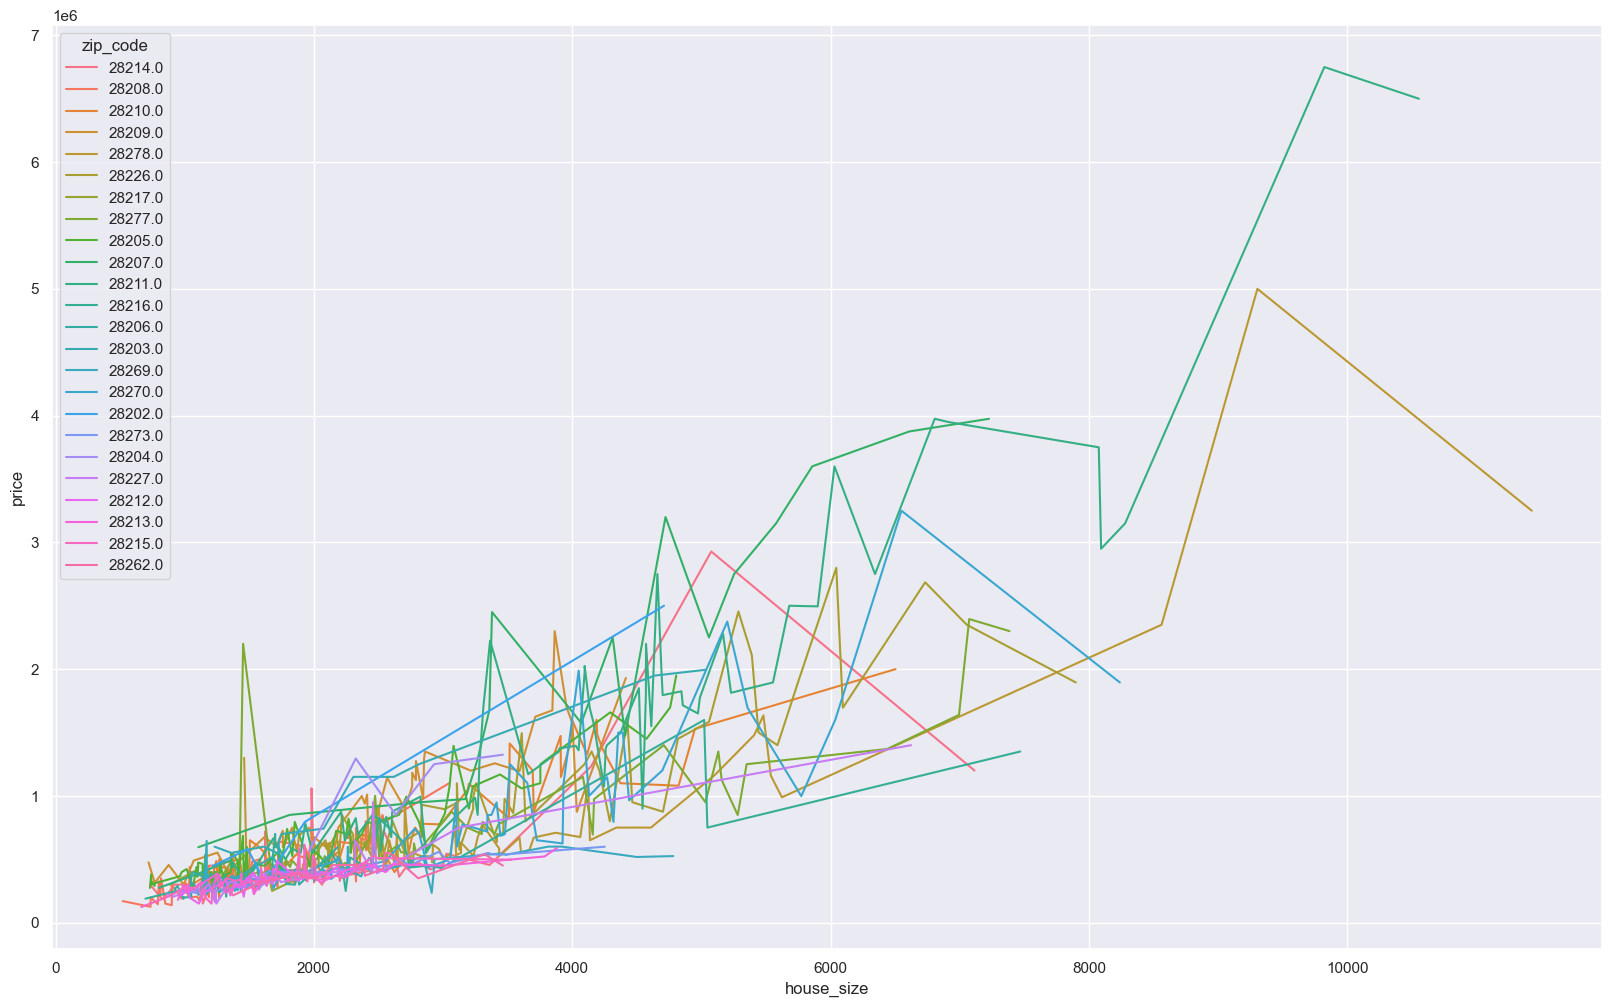

In [24]:
sns.set(rc={"figure.figsize":(20,12)}) # change the figure size to width=20, height=12
sns.lineplot(data=for_sale_clt_string_zip, x='house_size', y='price', hue='zip_code', units='zip_code', estimator = None)

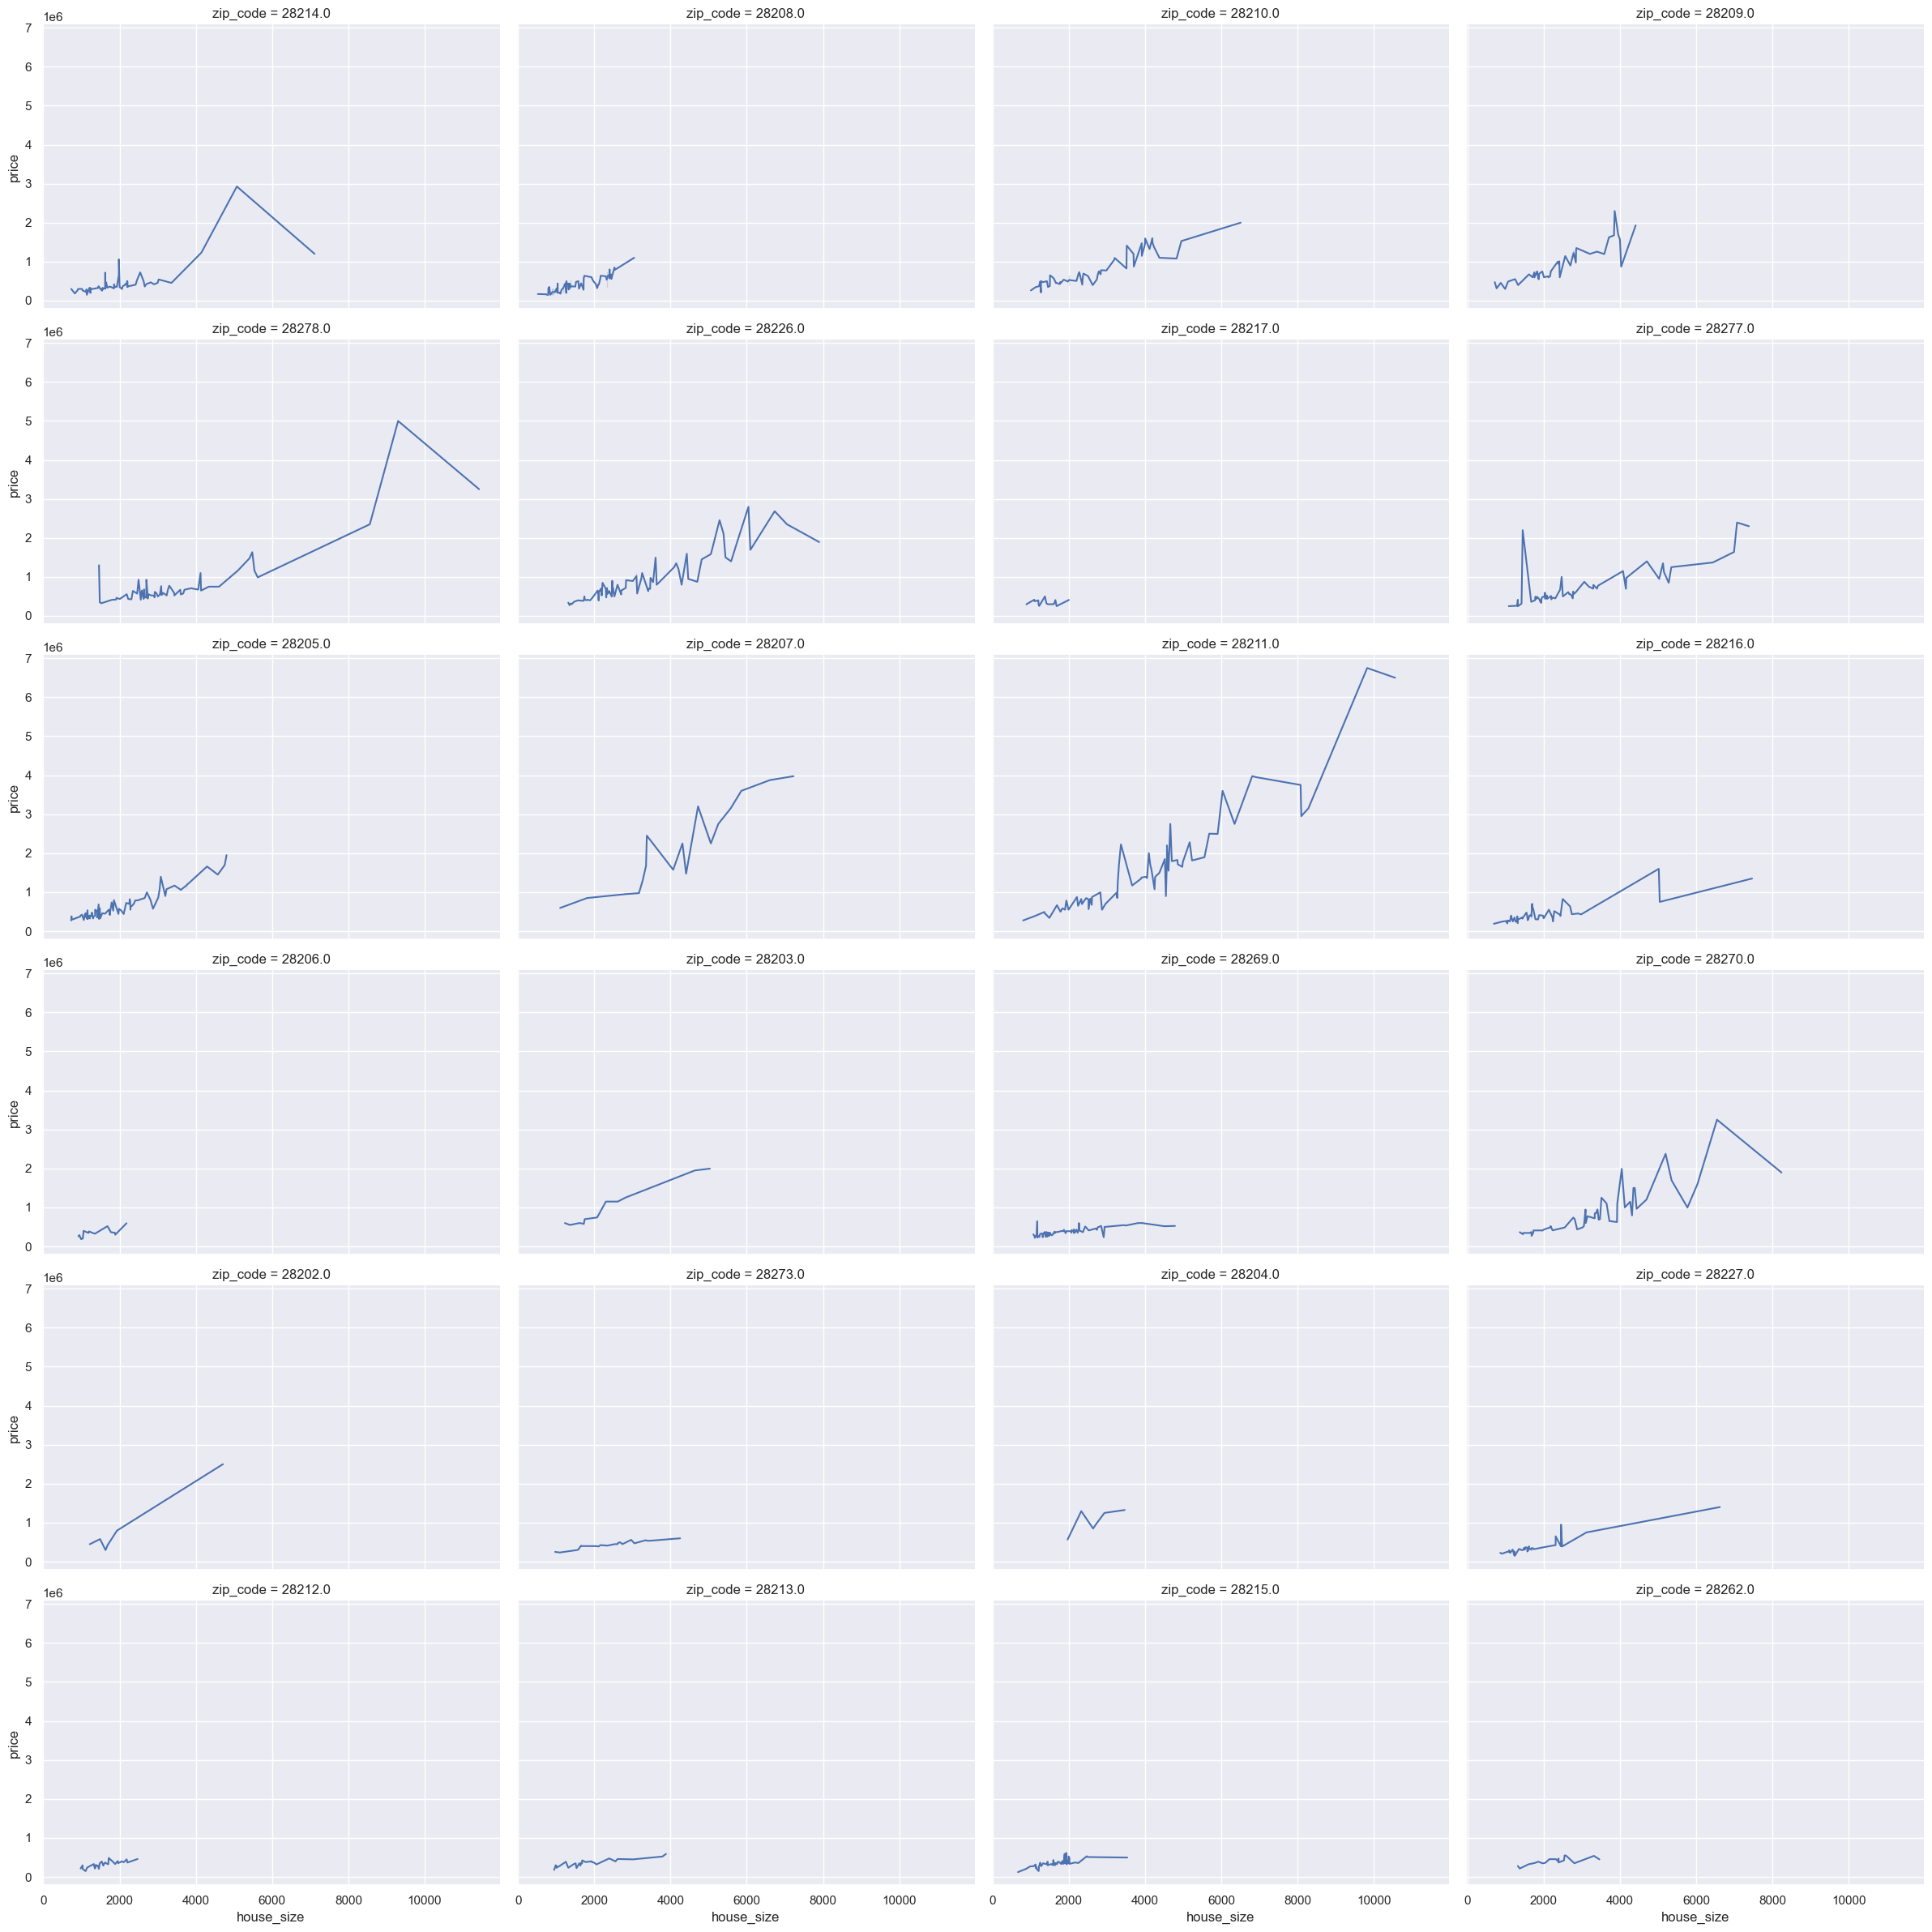

In [25]:
g = sns.FacetGrid(for_sale_clt_string_zip, col="zip_code", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, "house_size", "price")
plt.show()

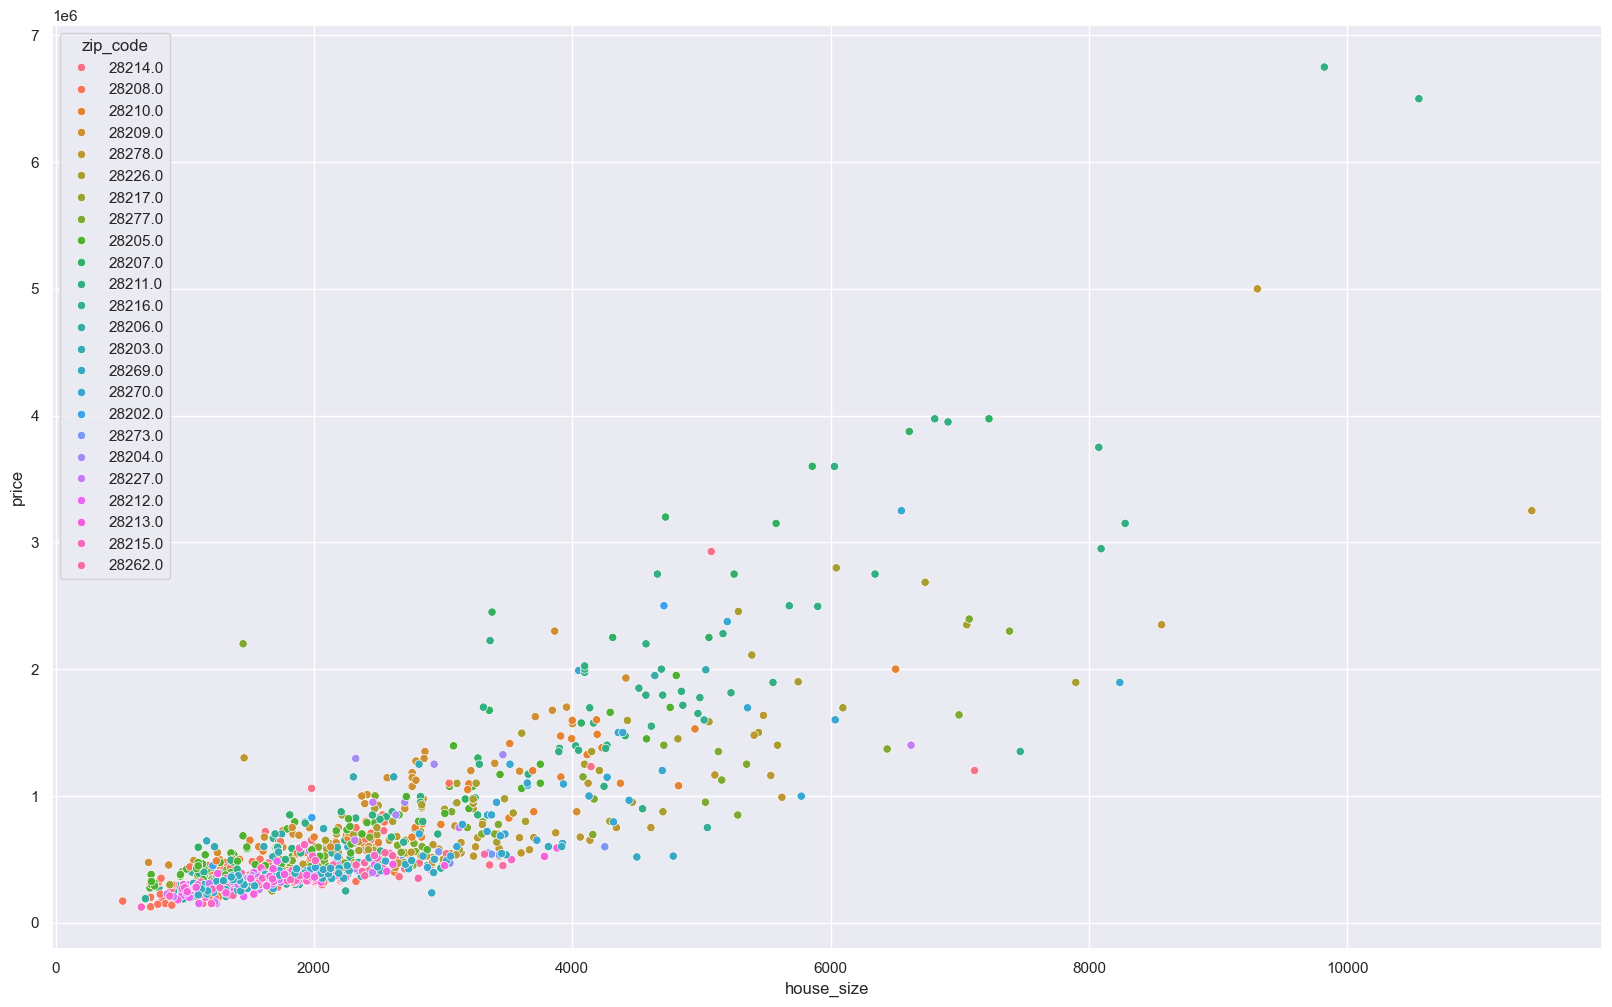

In [26]:
sns.set(rc={"figure.figsize": (20, 12)})  # Set figure size
sns.scatterplot(data=for_sale_clt_string_zip, x='house_size', y='price', hue='zip_code')
plt.show()

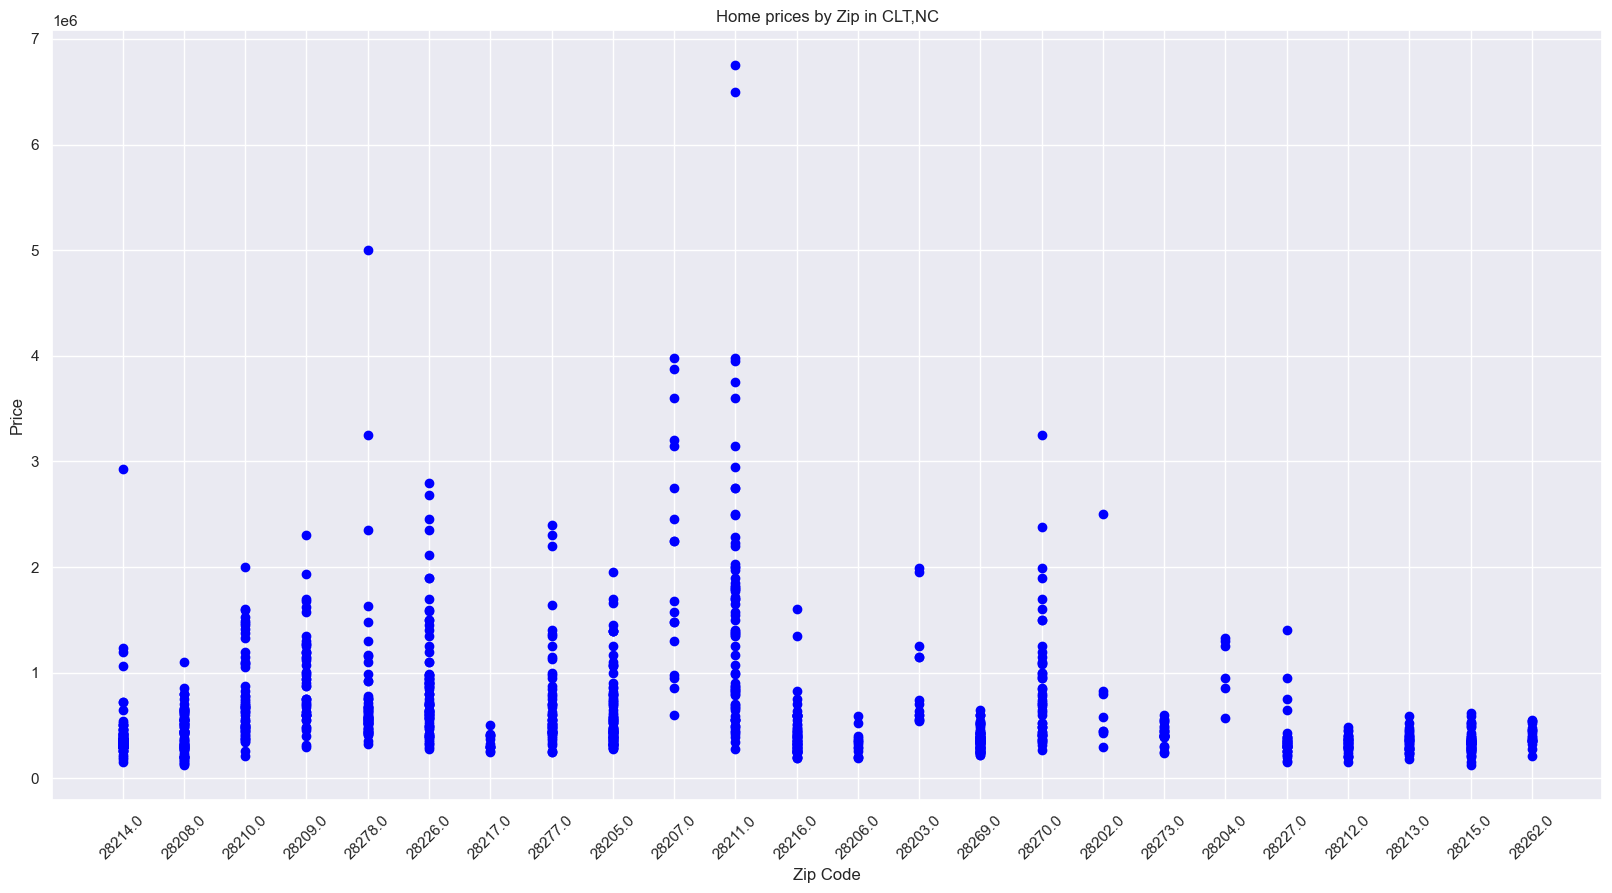

In [27]:

# a more professional looking plot, with saving to png!
# 1. prepare data
x = for_sale_clt_string_zip['zip_code']
y = for_sale_clt_string_zip['price']

# 2. setup plot
fig, ax = plt.subplots(figsize=(20, 10))

# 3. plotting data
ax.scatter(x, y, color='blue', marker='o')
# 4. customize plot
ax.set(title="Home prices by Zip in CLT,NC", xlabel="Zip Code", ylabel="Price")
ax.grid(True)  # Add grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# 5. save and show figure
fig.savefig('sample-plot.png', bbox_inches='tight')  # Save with tight bounding box
plt.show()  # Show the plot


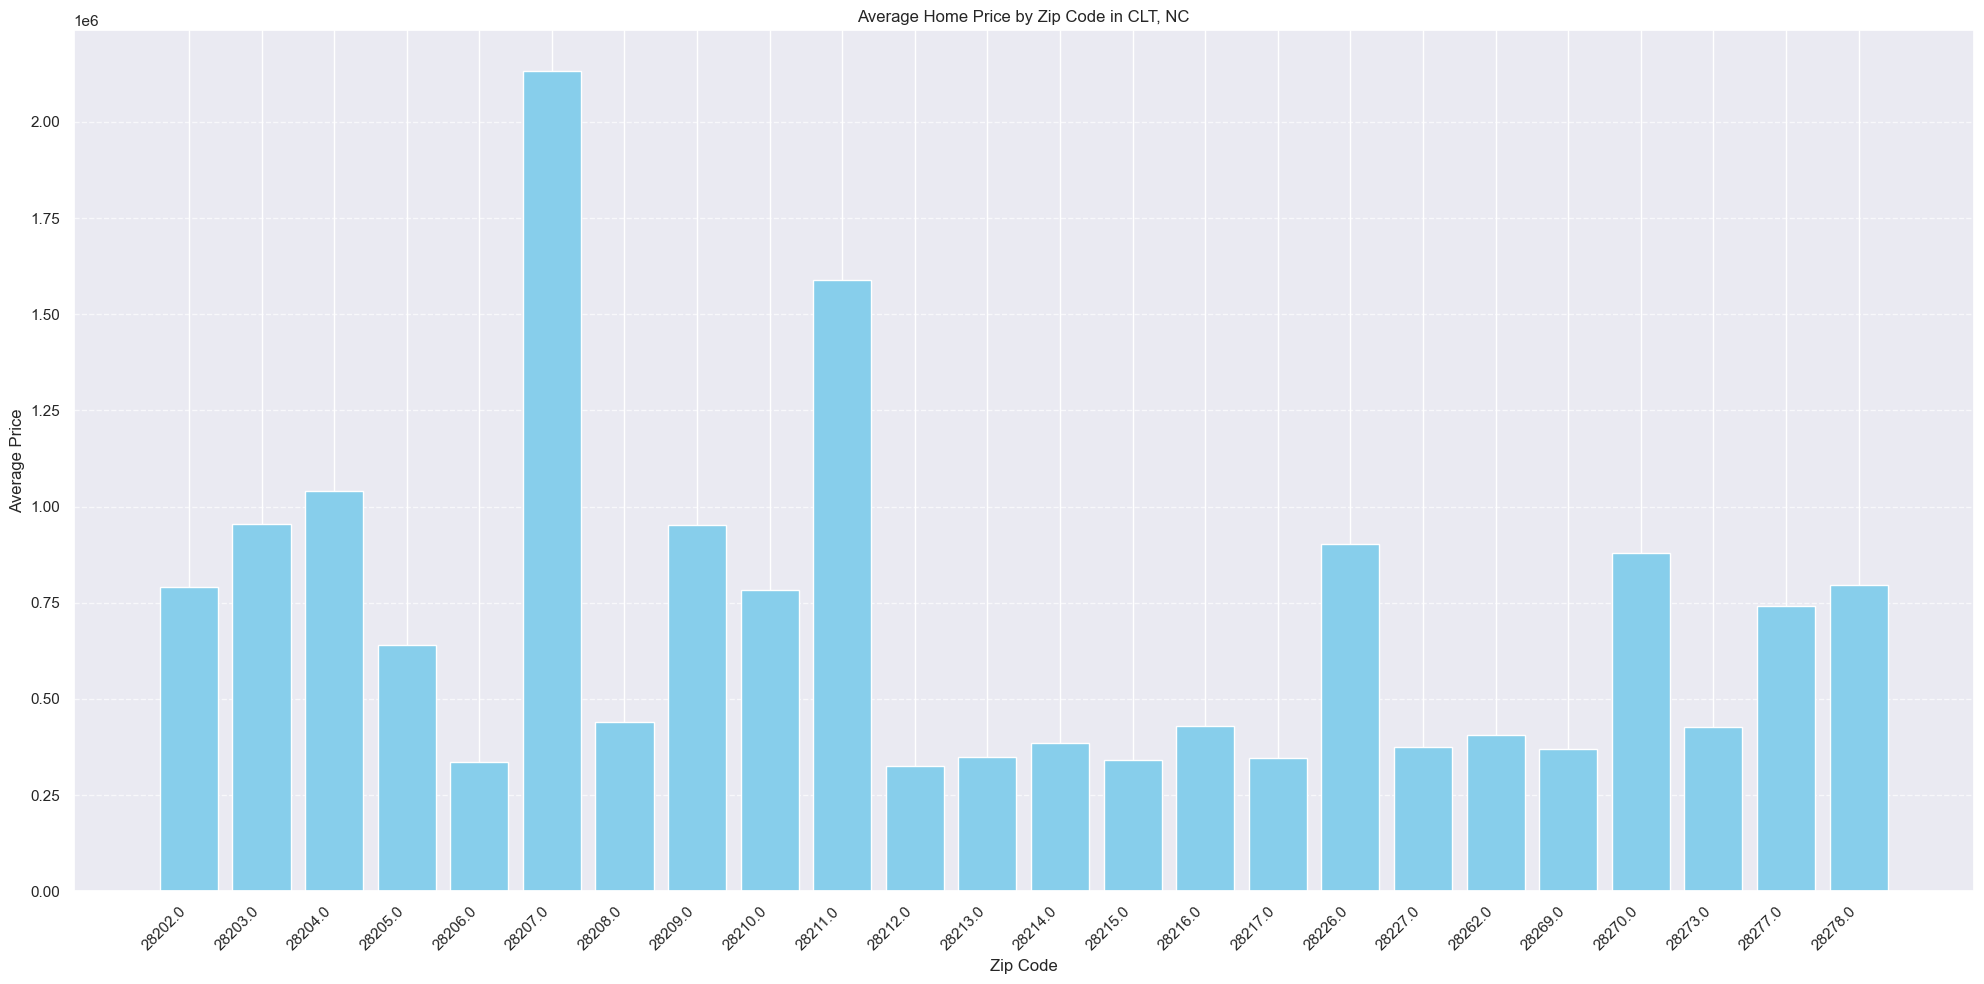

In [28]:



# 1. Calculate the average home price by zip code
avg_price_by_zip = for_sale_clt.groupby('zip_code')['price'].mean().reset_index()

# Sort by zip code for a consistent order in the bar plot
avg_price_by_zip = avg_price_by_zip.sort_values('zip_code')

# 2. Setup the plot
plt.figure(figsize=(20, 10))

# 3. Create the bar graph
plt.bar(avg_price_by_zip['zip_code'], avg_price_by_zip['price'], color='skyblue')

# 4. Customize the plot
plt.title('Average Home Price by Zip Code in CLT, NC')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability

# 5. Save the figure and show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping of tick labels
plt.savefig('average_home_price_by_zip.png', bbox_inches='tight', dpi=300)  # Save as a high-resolution PNG
plt.show()  # Display the plot


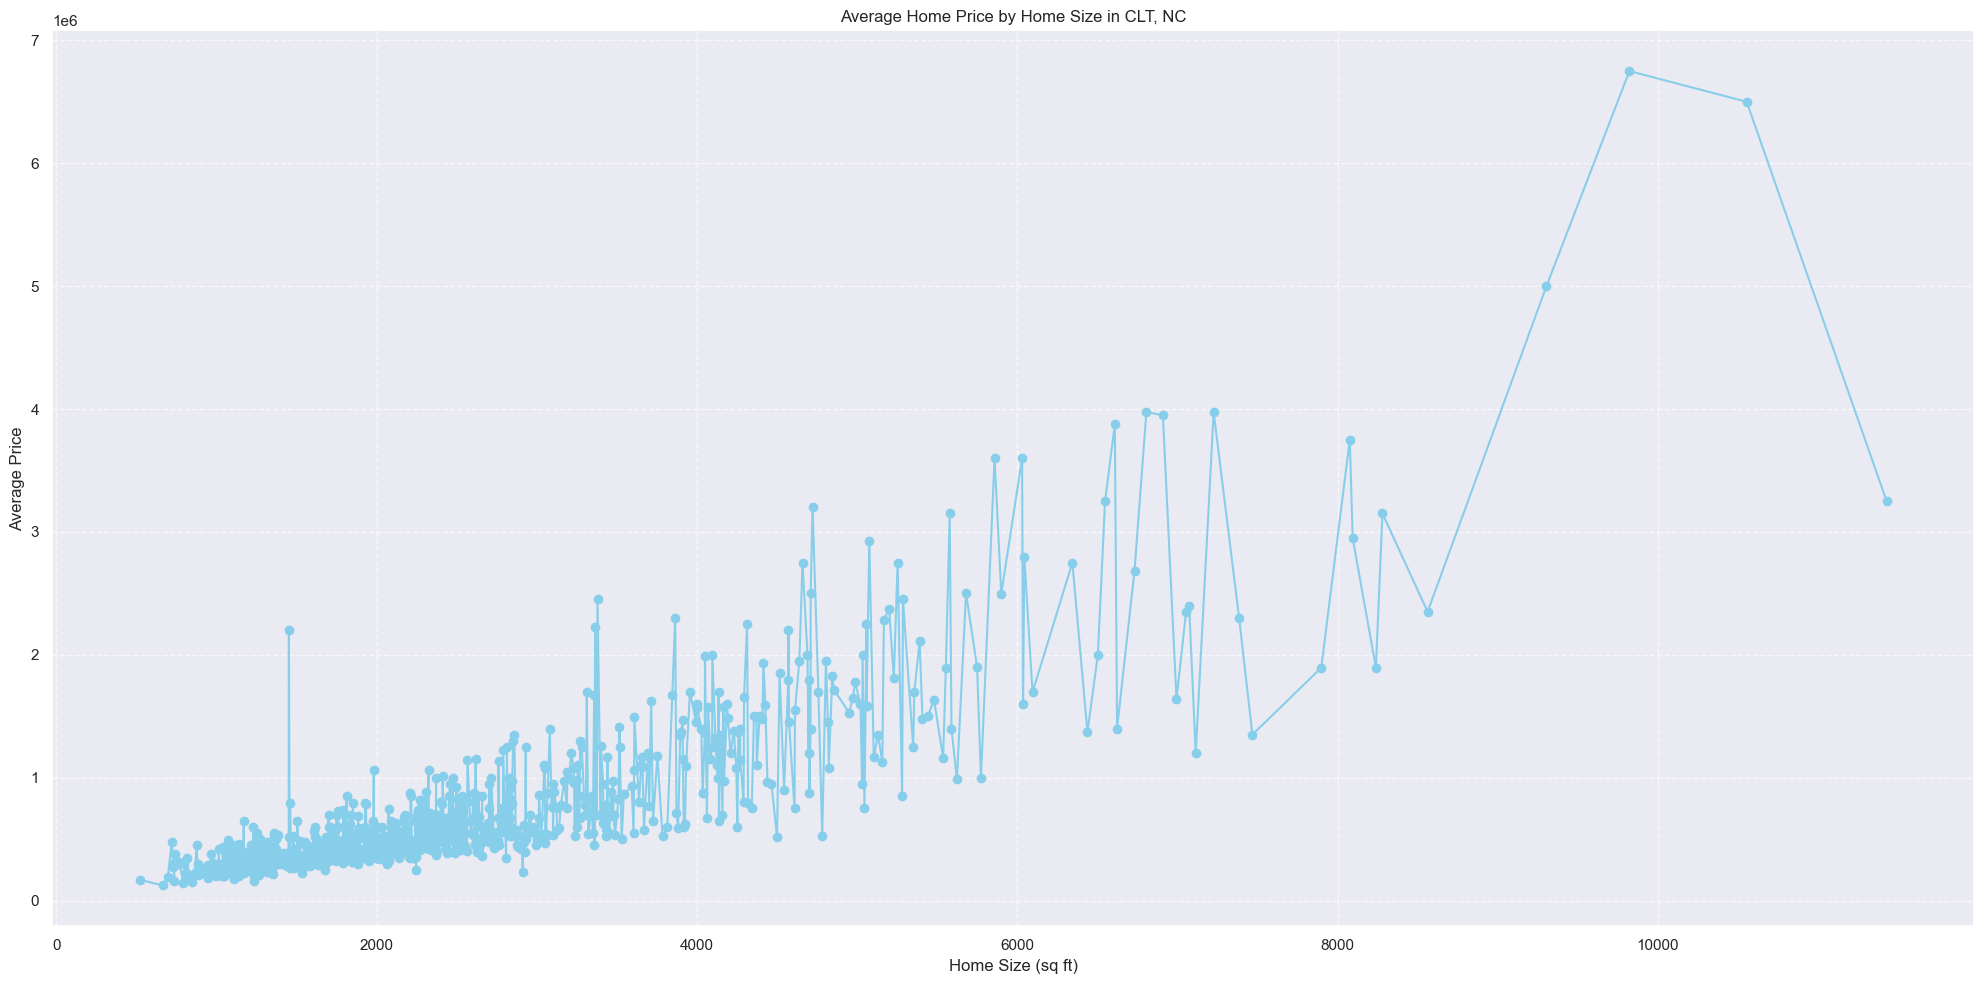

In [29]:


# 1. Calculate the average home price by home size
avg_price_by_size = for_sale_clt.groupby('house_size')['price'].mean().reset_index()

# Sort by house size for a consistent order in the plot
avg_price_by_size = avg_price_by_size.sort_values('house_size')

# 2. Setup the plot
plt.figure(figsize=(20, 10))

# 3. Create the plot (line plot is appropriate here to show trends)
plt.plot(avg_price_by_size['house_size'], avg_price_by_size['price'], marker='o', linestyle='-', color='skyblue')

# 4. Customize the plot
plt.title('Average Home Price by Home Size in CLT, NC')
plt.xlabel('Home Size (sq ft)')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

# 5. Save the figure and show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.savefig('average_home_price_by_size.png', bbox_inches='tight', dpi=300)  # Save as a high-resolution PNG
plt.show()  # Display the plot


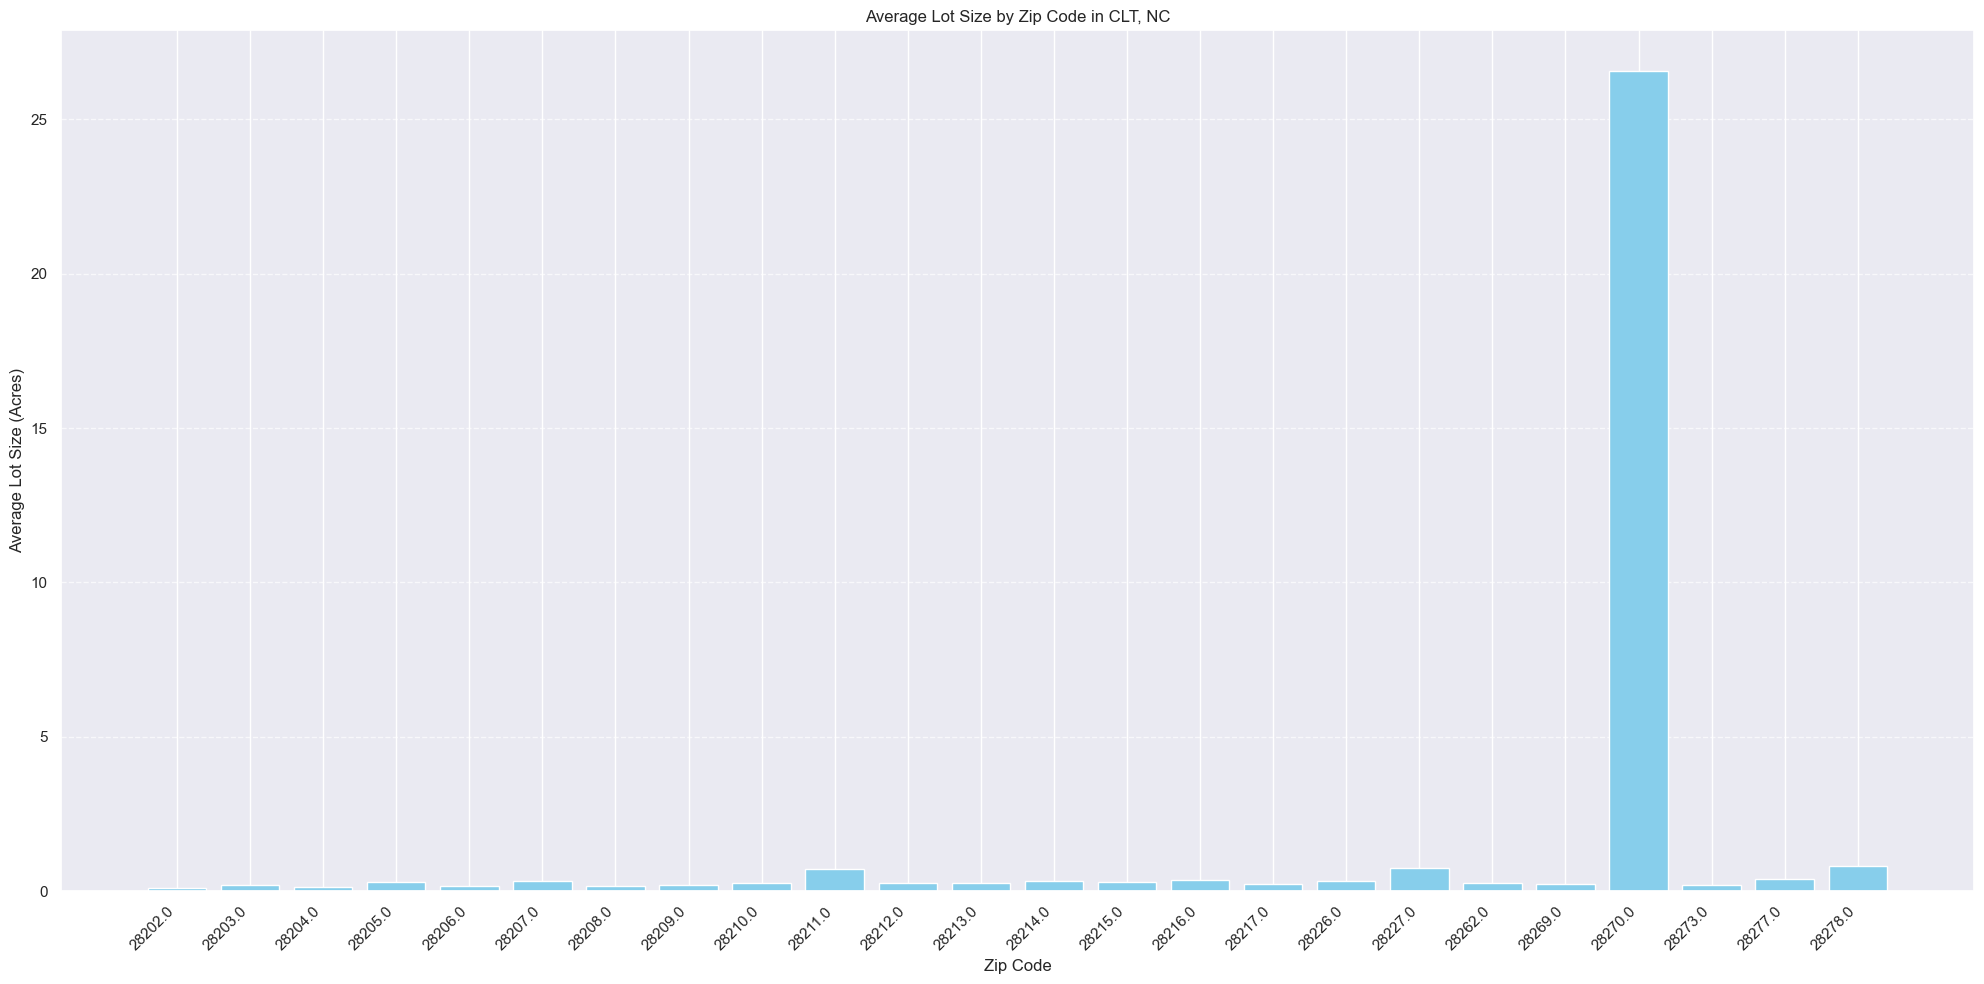

In [30]:

# 1. Calculate the average lot size by zip code
avg_lot_by_zip = for_sale_clt.groupby('zip_code')['acre_lot'].mean().reset_index()

# Sort by zip code for a consistent order in the bar plot
avg_lot_by_zip = avg_lot_by_zip.sort_values('zip_code')

# 2. Setup the plot
plt.figure(figsize=(20, 10))

# 3. Create the bar graph
plt.bar(avg_lot_by_zip['zip_code'], avg_lot_by_zip['acre_lot'], color='skyblue')

# 4. Customize the plot
plt.title('Average Lot Size by Zip Code in CLT, NC')
plt.xlabel('Zip Code')
plt.ylabel('Average Lot Size (Acres)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability

# 5. Save the figure and show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping of tick labels
plt.savefig('average_lot_size_by_zip.png', bbox_inches='tight', dpi=300)  # Save as a high-resolution PNG
plt.show()  # Display the plot


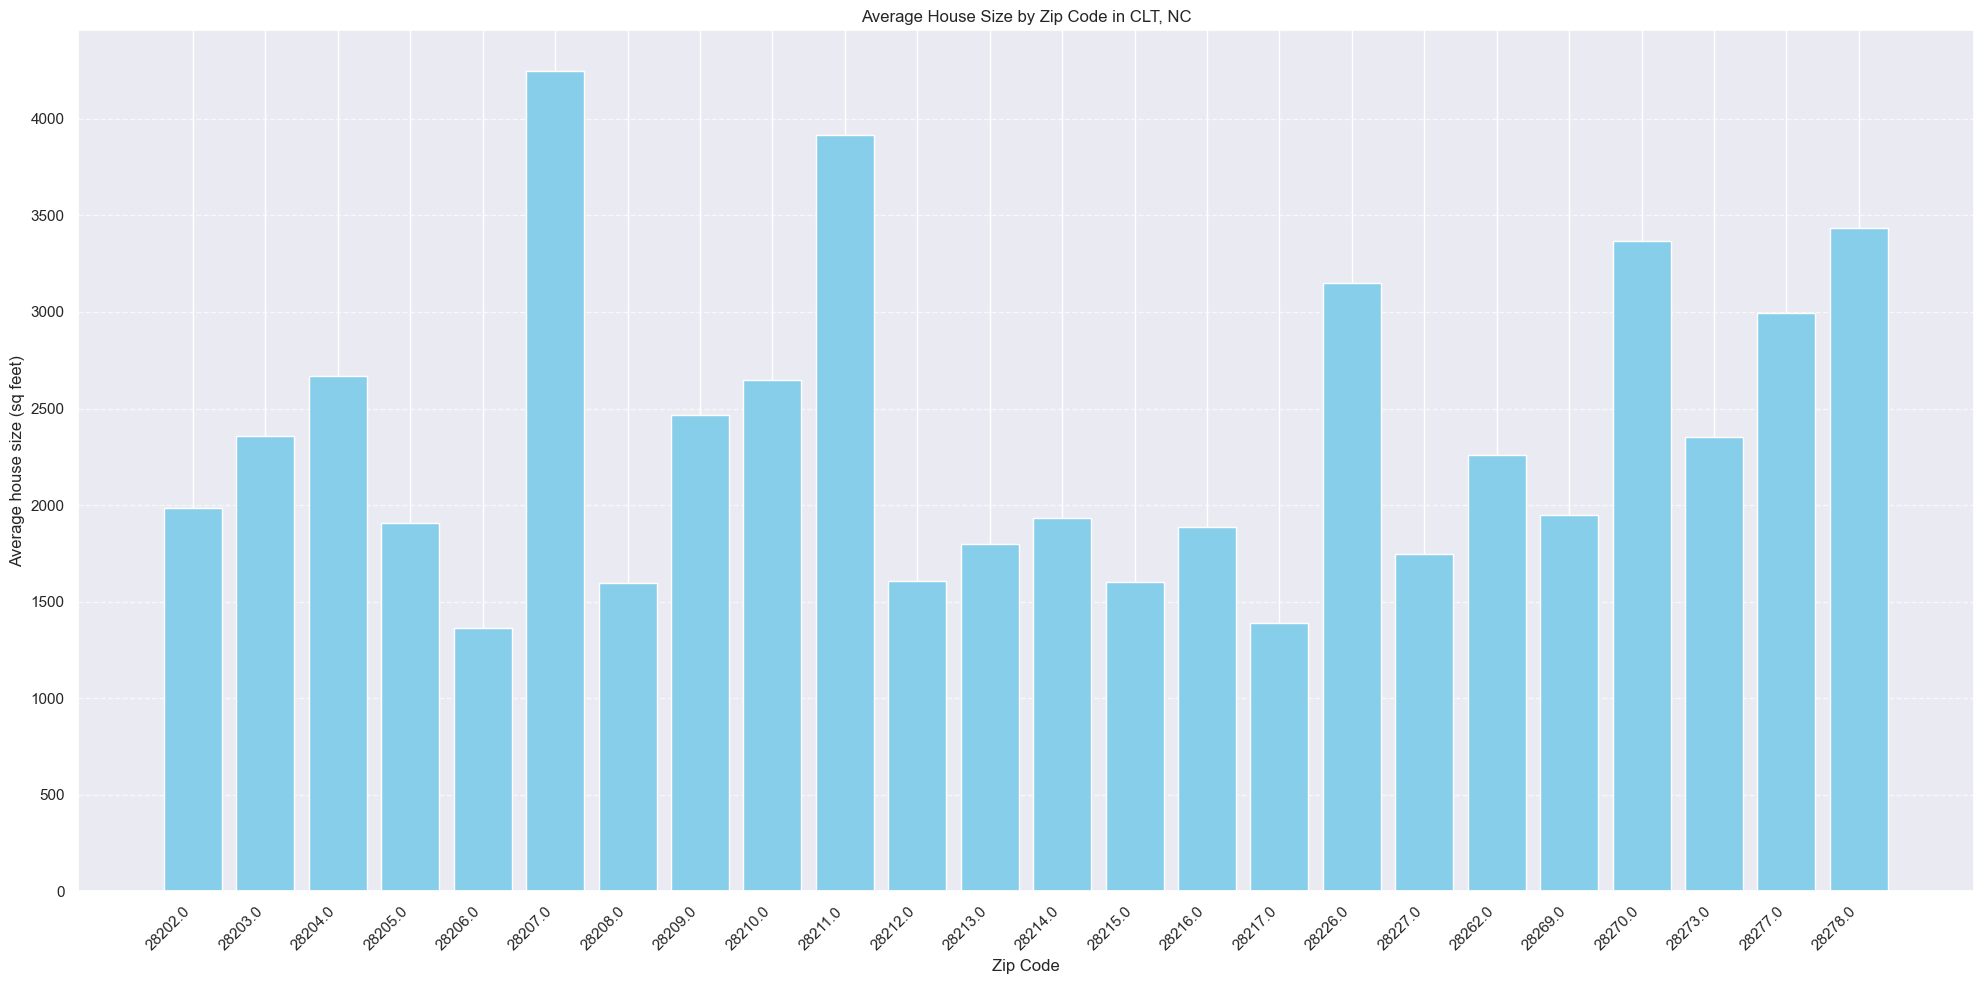

In [31]:

# 1. Calculate the average home size by zip code
avg_size_by_zip = for_sale_clt.groupby('zip_code')['house_size'].mean().reset_index()

# Sort by zip code for a consistent order in the bar plot
avg_size_by_zip = avg_size_by_zip.sort_values('zip_code')

# 2. Setup the plot
plt.figure(figsize=(20, 10))

# 3. Create the bar graph
plt.bar(avg_size_by_zip['zip_code'], avg_size_by_zip['house_size'], color='skyblue')

# 4. Customize the plot
plt.title('Average House Size by Zip Code in CLT, NC')
plt.xlabel('Zip Code')
plt.ylabel('Average house size (sq feet)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability

# 5. Save the figure and show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping of tick labels
plt.savefig('average_house_size_by_zip.png', bbox_inches='tight', dpi=300)  # Save as a high-resolution PNG
plt.show()  # Display the plot

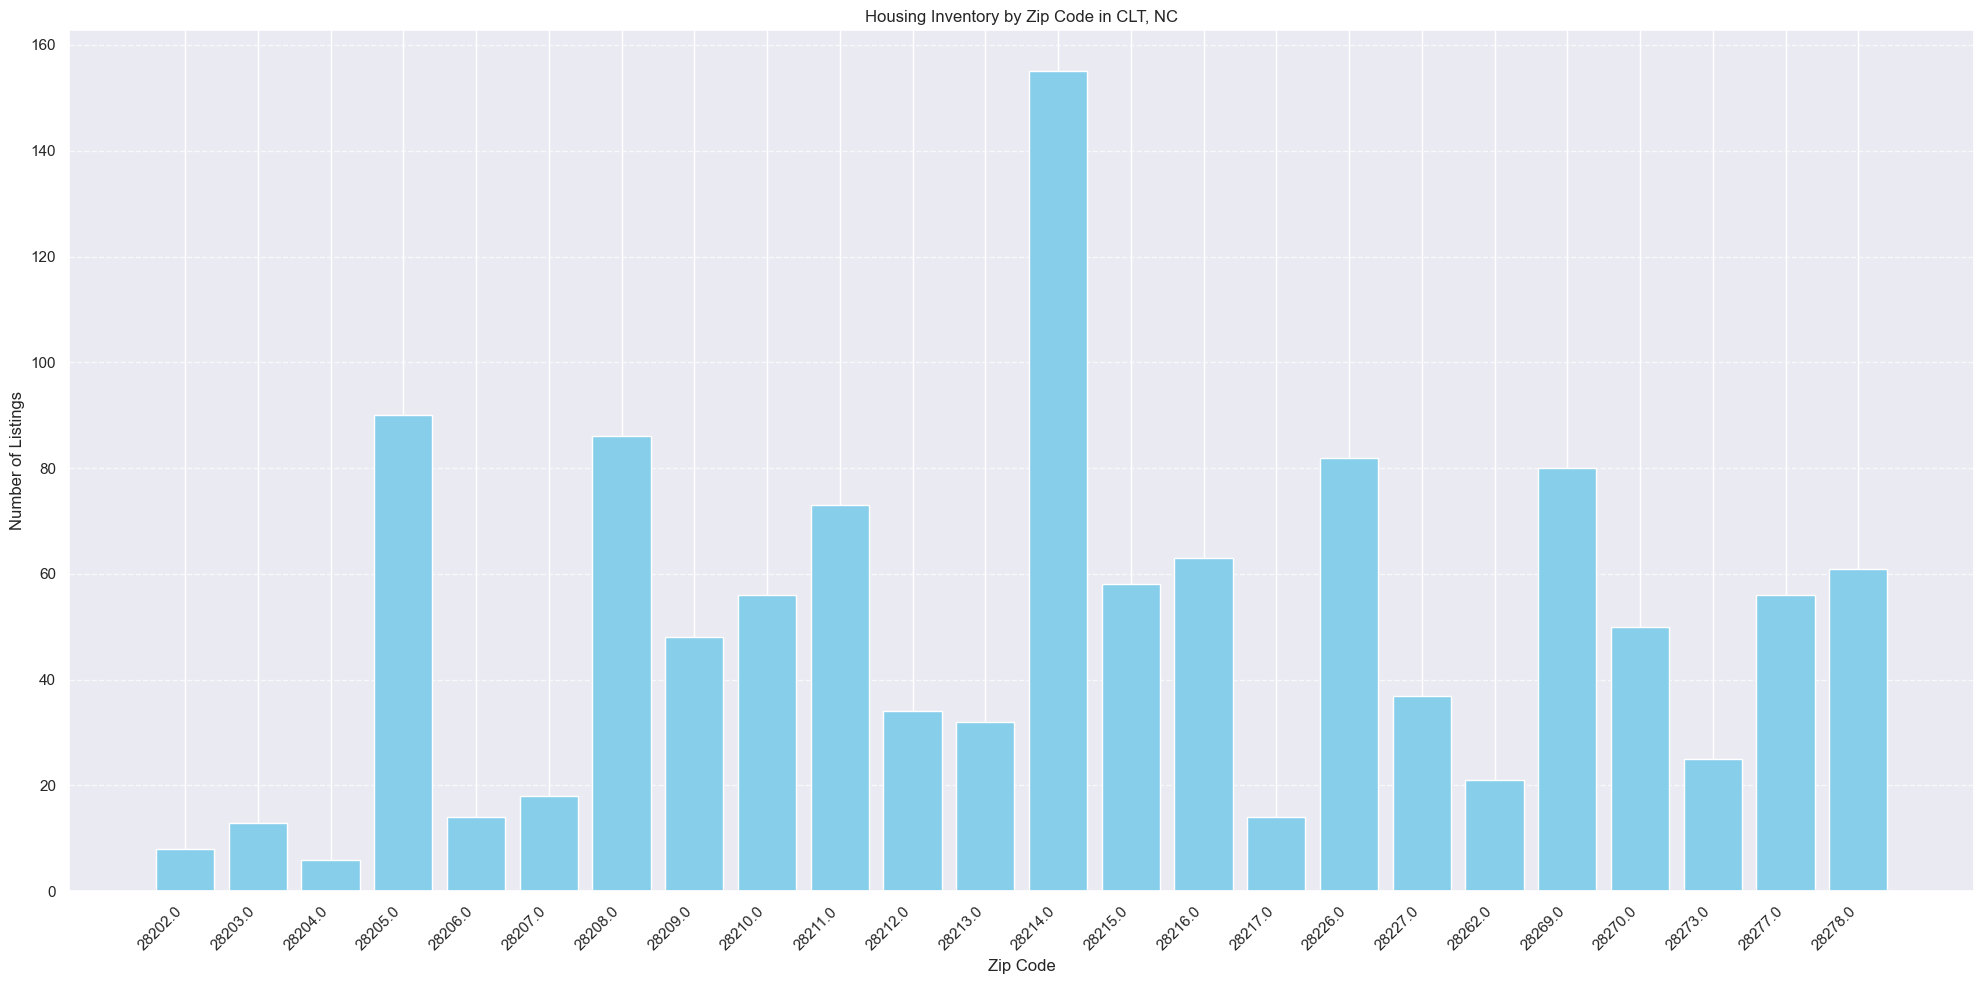

In [32]:

# 1. Calculate the housing inventory (count of listings) by zip code
inventory_by_zip = for_sale_clt.groupby('zip_code').size().reset_index(name='inventory')

# Sort by zip code for a consistent order in the bar plot
inventory_by_zip = inventory_by_zip.sort_values('zip_code')

# 2. Setup the plot
plt.figure(figsize=(20, 10))

# 3. Create the bar graph
plt.bar(inventory_by_zip['zip_code'], inventory_by_zip['inventory'], color='skyblue')

# 4. Customize the plot
plt.title('Housing Inventory by Zip Code in CLT, NC')
plt.xlabel('Zip Code')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability

# 5. Save the figure and show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping of tick labels
plt.savefig('housing_inventory_by_zip.png', bbox_inches='tight', dpi=300)  # Save as a high-resolution PNG
plt.show()  # Display the plot

In [33]:
for_sale_clt.head()

,price,bed,bath,acre_lot,zip_code,house_size
298133,2927972.0,4.0,5.0,3.74,28214.0,5076.0
298732,265000.0,2.0,1.0,0.24,28208.0,975.0
298734,825000.0,5.0,4.0,0.36,28210.0,3510.0
298737,353500.0,3.0,3.0,0.12,28214.0,1928.0
298738,489900.0,2.0,1.0,0.16,28209.0,1070.0


In [34]:
for_sale_clt.shape

(1180, 6)

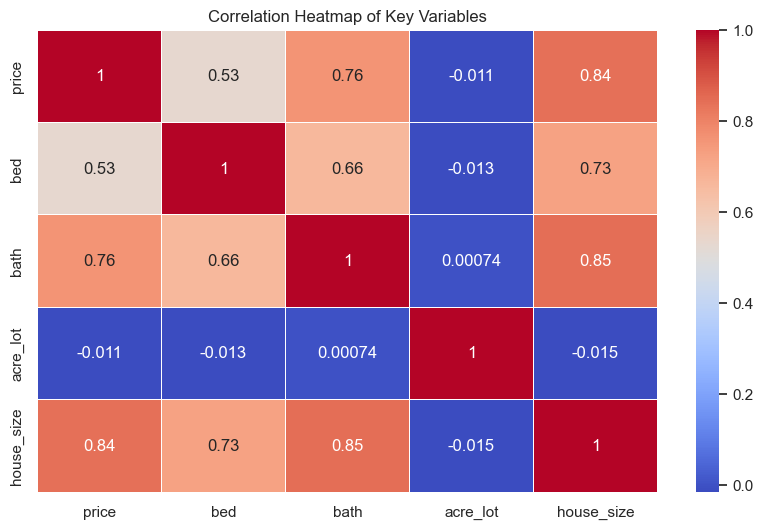

In [74]:
# Calculate the correlation matrix
correlation_matrix = for_sale_clt[['price', 'bed', 'bath', 'acre_lot', 'house_size']].corr()

# Set up matplotlib figure
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Key Variables')
plt.show()